In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ast
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import normalize
from keras.preprocessing import image
from time import time
from scipy.spatial.distance import cosine, euclidean, hamming

In [3]:
recipe = pd.read_csv(r'Data/raw-data_recipe.csv')

In [4]:
recipe.head(5)

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


In [5]:
def avg_rate(col):
    return f'{col:.2f}'
recipe.aver_rate = recipe.aver_rate.apply(avg_rate)
recipe.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


In [6]:
recipe.aver_rate = recipe.aver_rate.astype(float)
recipe.dtypes
list_of_dict = []

for row in recipe.nutritions:
    list_of_dict.append(ast.literal_eval(row))
list_of_dict[1]


'18'
# extract percent daily values for selected nutritions
calories_list = []
fat_list = []
carbohydrates_list = []
protein_list = []
cholesterol_list = []
sodium_list = []
fiber_list = []

for x in range(len(list_of_dict)):
    calories_list.append(list_of_dict[x]['calories']['percentDailyValue'])
    fat_list.append(list_of_dict[x]['fat']['percentDailyValue'])
    carbohydrates_list.append(list_of_dict[x]['carbohydrates']['percentDailyValue'])
    protein_list.append(list_of_dict[x]['protein']['percentDailyValue'])
    cholesterol_list.append(list_of_dict[x]['cholesterol']['percentDailyValue'])
    sodium_list.append(list_of_dict[x]['sodium']['percentDailyValue'])
    fiber_list.append(list_of_dict[x]['fiber']['percentDailyValue'])
    
    
# group all the data into dataframe
data = {'calories': calories_list, 'fat': fat_list, 'carbohydrates': carbohydrates_list, 
       'protein': protein_list, 'cholesterol': cholesterol_list, 'sodium': sodium_list, 
       'fiber': fiber_list}

df = pd.DataFrame(data)
df.index = recipe['recipe_id']
df.head()

,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
recipe_id,,,,,,,
222388,15,36,< 1,42,21,81,2
240488,19,18,10,73,33,104,41
218939,17,36,2,48,24,31,4
87211,32,45,20,65,20,43,18
245714,8,12,5,14,7,8,3


(48735, 7)
recipe_id      87211
calories          32
fat               45
carbohydrates     20
protein           65
cholesterol       20
sodium            43
fiber             18


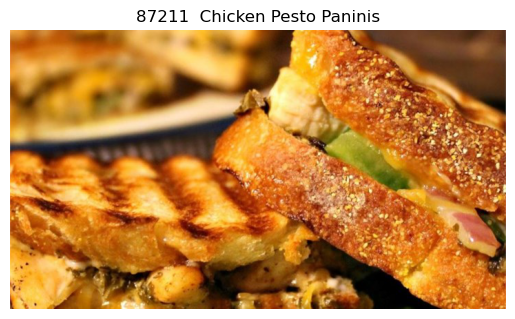

In [17]:
print(df.shape)
df = df.dropna()
def text_cleaning(cols):
    if cols == '< 1':
        return 1
    else:
        return cols

for col in df.columns:
    df[col] = df[col].apply(text_cleaning)
df = df.apply(pd.to_numeric)
# normalized nutrition data by columns
df_normalized = pd.DataFrame(normalize(df, axis=0))
df_normalized.columns = df.columns
df_normalized.index = df.index
df_normalized.head()


# show recipe id, recipe name and image of selected recipe
def selected_recipe(recipe_id):
    image_path = "Data/raw-data-images/raw-data-images/{}.jpg"
    image_path = image_path.format(recipe_id)
    
    img = image.load_img(image_path)
    img = image.img_to_array(img, dtype='int')
        
    fig, ax = plt.subplots(1,1)
    ax.imshow(img)
    ax.axis('off')
    
    recipe_df = recipe.set_index('recipe_id')
    x = "{}  {}".format(recipe_id, recipe_df.at[recipe_id, 'recipe_name'])
    ax.set_title(x)
    
    print(df.loc[df.index.isin([recipe_id])].transpose())
    
selected_recipe(87211)


recipe_final= pd.merge(recipe, df, on='recipe_id')
recipe_final= recipe_final.drop(columns=['nutritions'])

recipe_final.to_csv("recipe_final.csv")

In [18]:
ingredients_list = []

for x in range(len(recipe_final)):
    ingredients_list.append(recipe_final['ingredients'][x].split('^'))
data = {'ingredients_list': ingredients_list}
df1 = pd.DataFrame(data)
df1.index = recipe_final['recipe_id']
df1.head()

recipe_final= pd.merge(recipe_final, df1, on='recipe_id')
recipe_final= recipe_final.drop(columns=['ingredients'])
recipe_final.head()

recipe_final.to_csv("recipe_final.csv")